<a href="https://colab.research.google.com/github/Subhamtr01/BDDA/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Titanic

The sinking of the RMS Titanic marked a tragic event in maritime history, resulting in a significant loss of life during its maiden voyage from Southampton, England to New York City, United States, on 15 April 1912. The ship, operated by the White Star Line, struck an iceberg in the North Atlantic Ocean. With approximately 2,224 passengers and crew members on board, the disaster claimed the lives of over 1,500 individuals. This catastrophic incident remains one of the most devastating peacetime sinkings of an ocean liner or cruise ship.

# Table of Contents

1. Objective
2. Import the libraries
3. Dataset Description
4. Exploratory data analysis(EDA)
5. Data preprocessing
6. Construct Model with 5 different machine learning algorithms  

   (1) Support Vector Machine (SVM)

   (2) Gradient Boosting

   (3) DecisionTreeClassifier

   (4) RandomForestClassifier

   (5) XGBClassifier (XGBoost)

7. Then finding Precision, Recall, Accuracy value for all the 5 model and comparing these value for the prediction

8. Prediction ( Model with highest Accuracy)


# Objective
To build a predictive model that answers the question:


*  What sorts of people were more likely to survive?

In [ ]:
# Data analysis
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For printing multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Visualization parameters
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_format = 'retina'

In [ ]:
# Important library
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

from pathlib import Path

In [ ]:
# Display from a cell outputs of multiple commands:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Titanic_train dataset
df = pd.read_csv("https://raw.githubusercontent.com/ram30098singh/Dataset/main/titanic_train.csv")


In [ ]:
# Titanic_test dataset
df_test = pd.read_csv("https://raw.githubusercontent.com/ram30098singh/Dataset/main/titanic_test.csv")

## Loading and Explore the train dataset

In [ ]:
df.shape
df.head()

(891, 12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Loading and Explore the test dataset

In [ ]:
df_test.shape
df_test.head()

(418, 11)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df_test.duplicated().sum()

0

In [ ]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Exploratory data analysis

In [ ]:
df = df.rename(columns = {'Sex' : 'Gender'})
df_test = df_test.rename(columns = {'Sex' : 'Gender'})

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Survived', ylabel='count'>

Text(0.5, 1.0, 'Survived vs Dead')

[Text(0, 0, '549.00'), Text(0, 0, '342.00')]

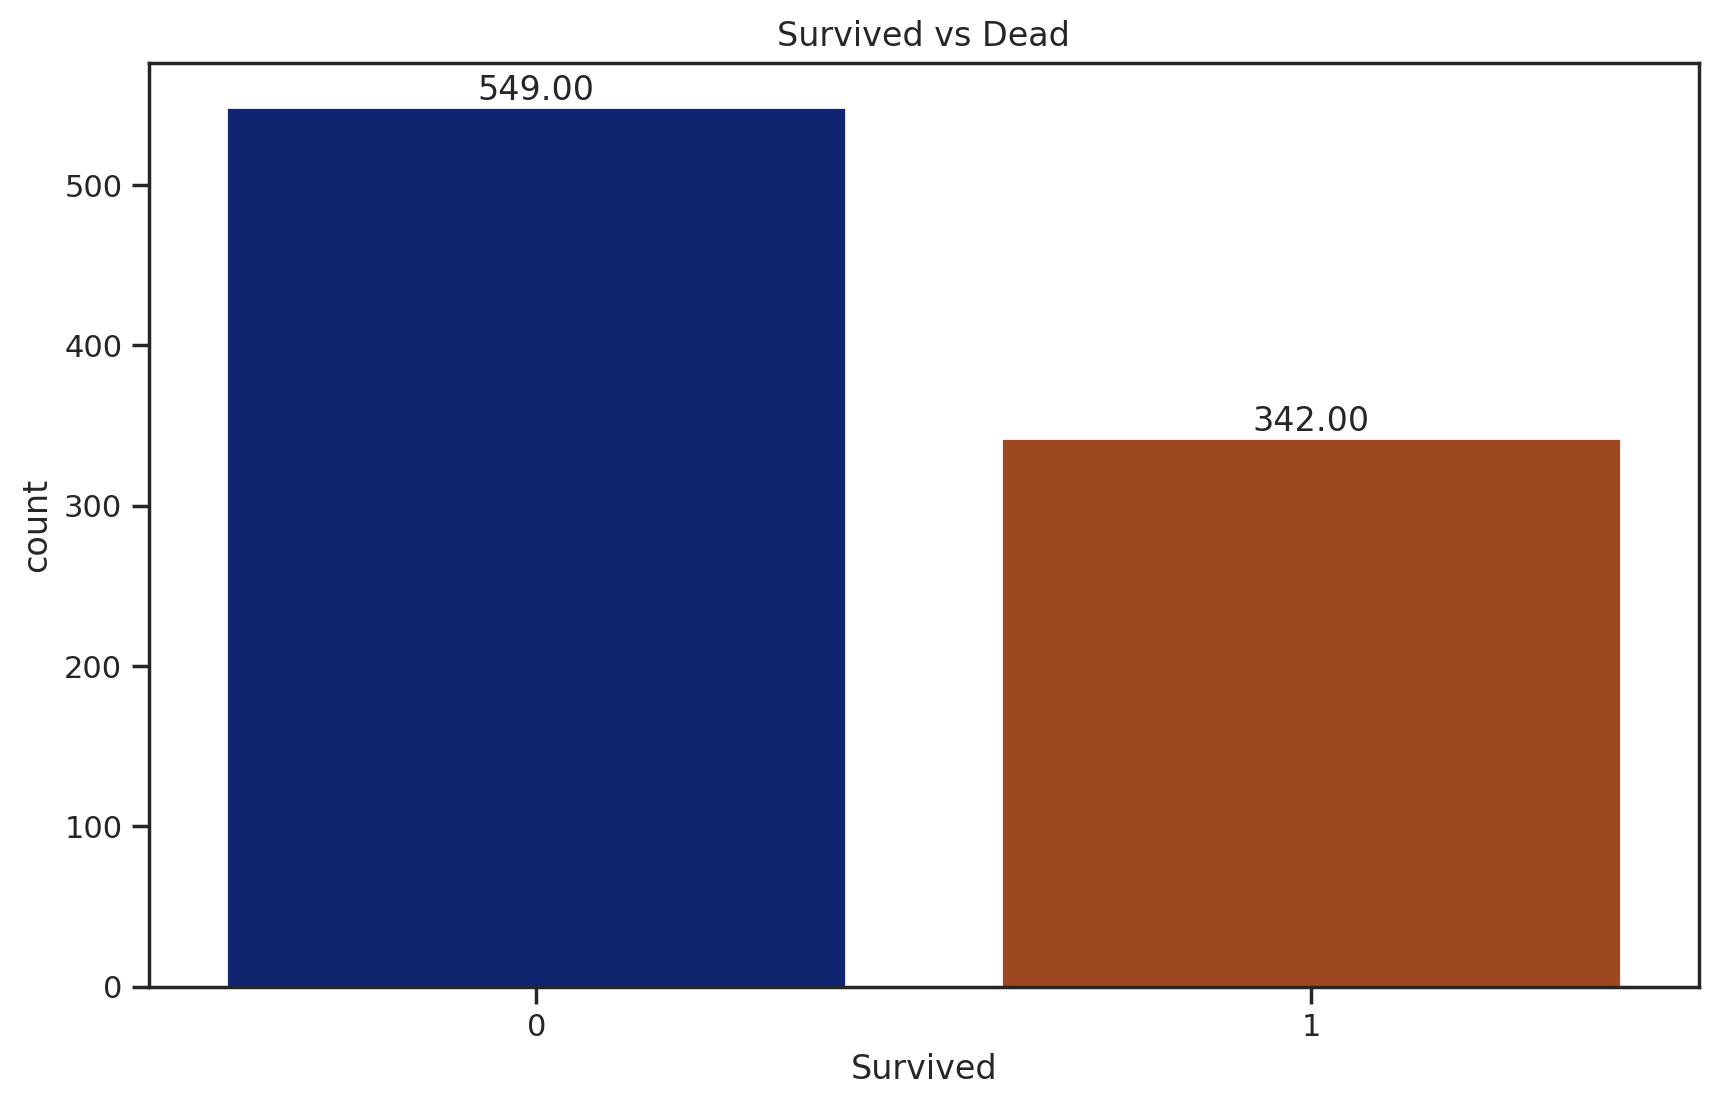

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_palette("dark")  # Set a dark color palette
sns.countplot(x='Survived', data=df)
plt.title('Survived vs Dead')

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

Text(0.5, 1.0, 'Survived vs Dead with Gender')

[Text(0, 0, '468.00'), Text(0, 0, '109.00')]

[Text(0, 0, '81.00'), Text(0, 0, '233.00')]

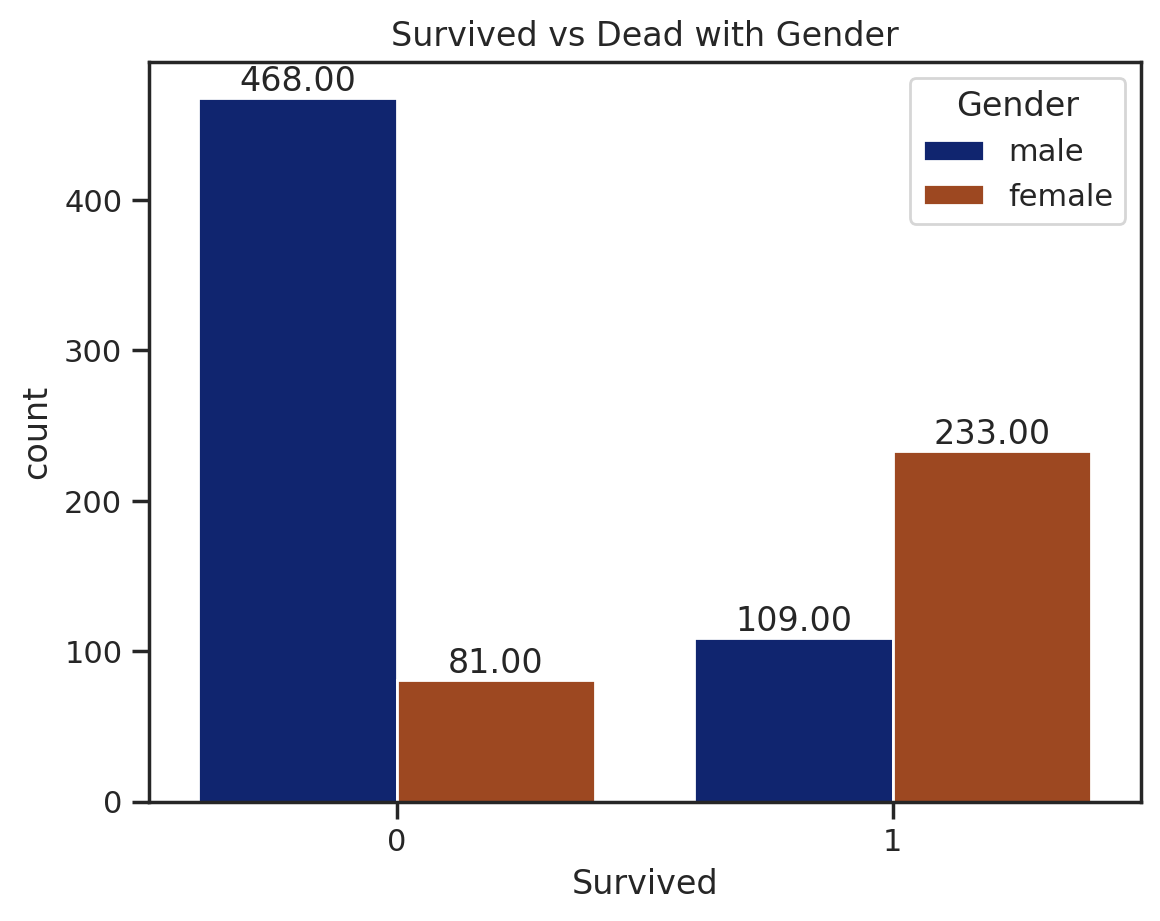

In [ ]:
sns.countplot(x='Survived', hue='Gender', data=df)
plt.title('Survived vs Dead with Gender')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

Text(0.5, 1.0, 'Male Vs Female with Class')

[Text(0, 0, '122.00'), Text(0, 0, '108.00'), Text(0, 0, '347.00')]

[Text(0, 0, '94.00'), Text(0, 0, '76.00'), Text(0, 0, '144.00')]

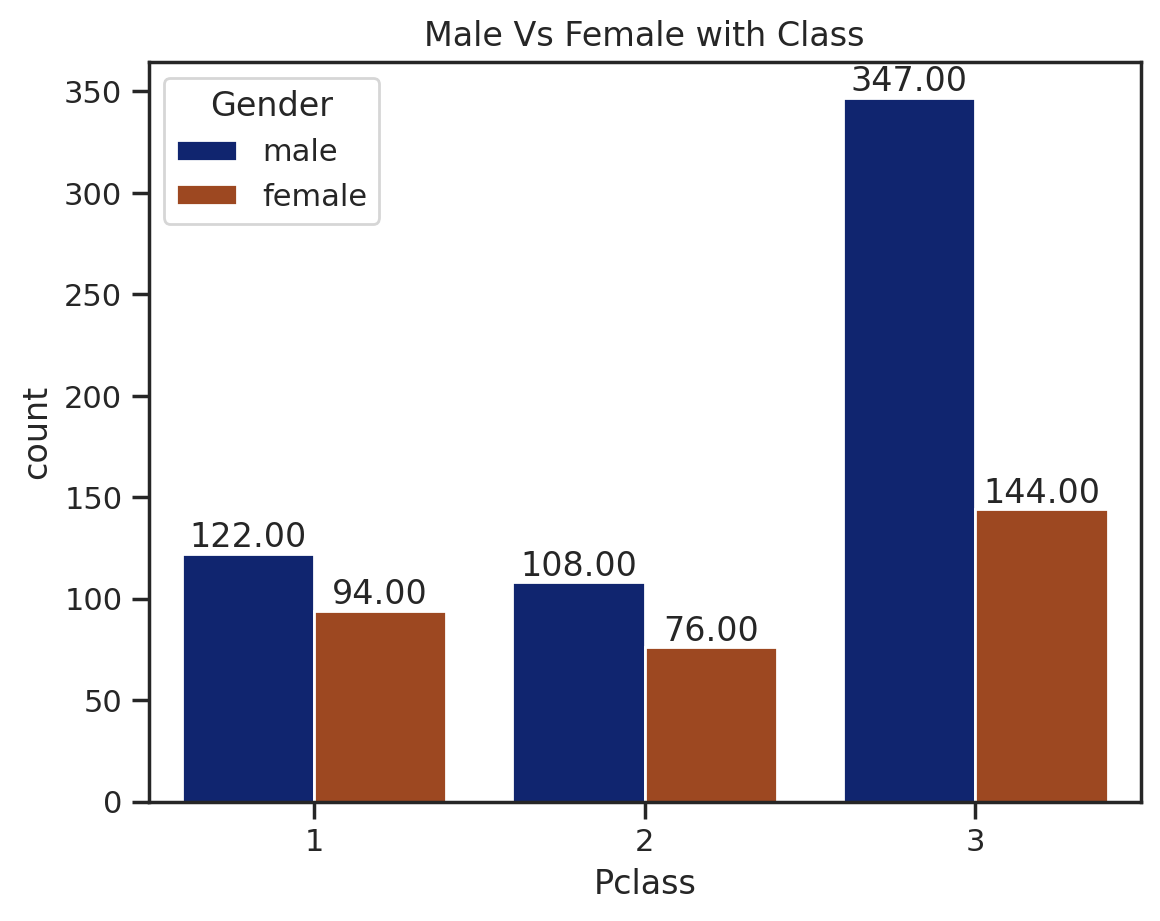

In [ ]:
sns.countplot(x='Pclass', hue='Gender', data=df)
plt.title('Male Vs Female with Class')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')
plt.show()

pclass:

A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

<Axes: xlabel='Pclass', ylabel='count'>

Text(0.5, 1.0, 'Survived vs Dead with Class')

[Text(0, 0, '80.00'), Text(0, 0, '97.00'), Text(0, 0, '372.00')]

[Text(0, 0, '136.00'), Text(0, 0, '87.00'), Text(0, 0, '119.00')]

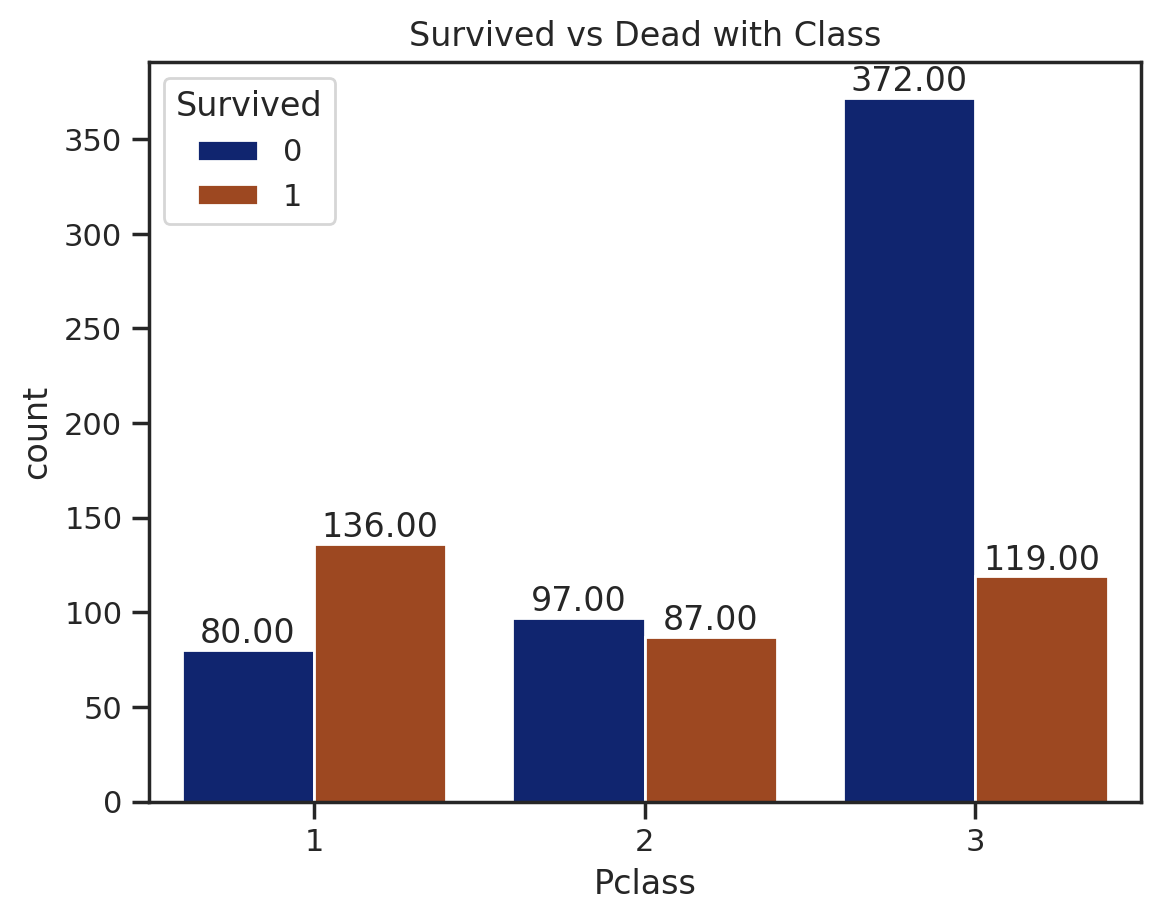

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survived vs Dead with Class')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Age', ylabel='Fare'>

Text(0.5, 1.0, 'Scatter Plot: Age vs Fare')

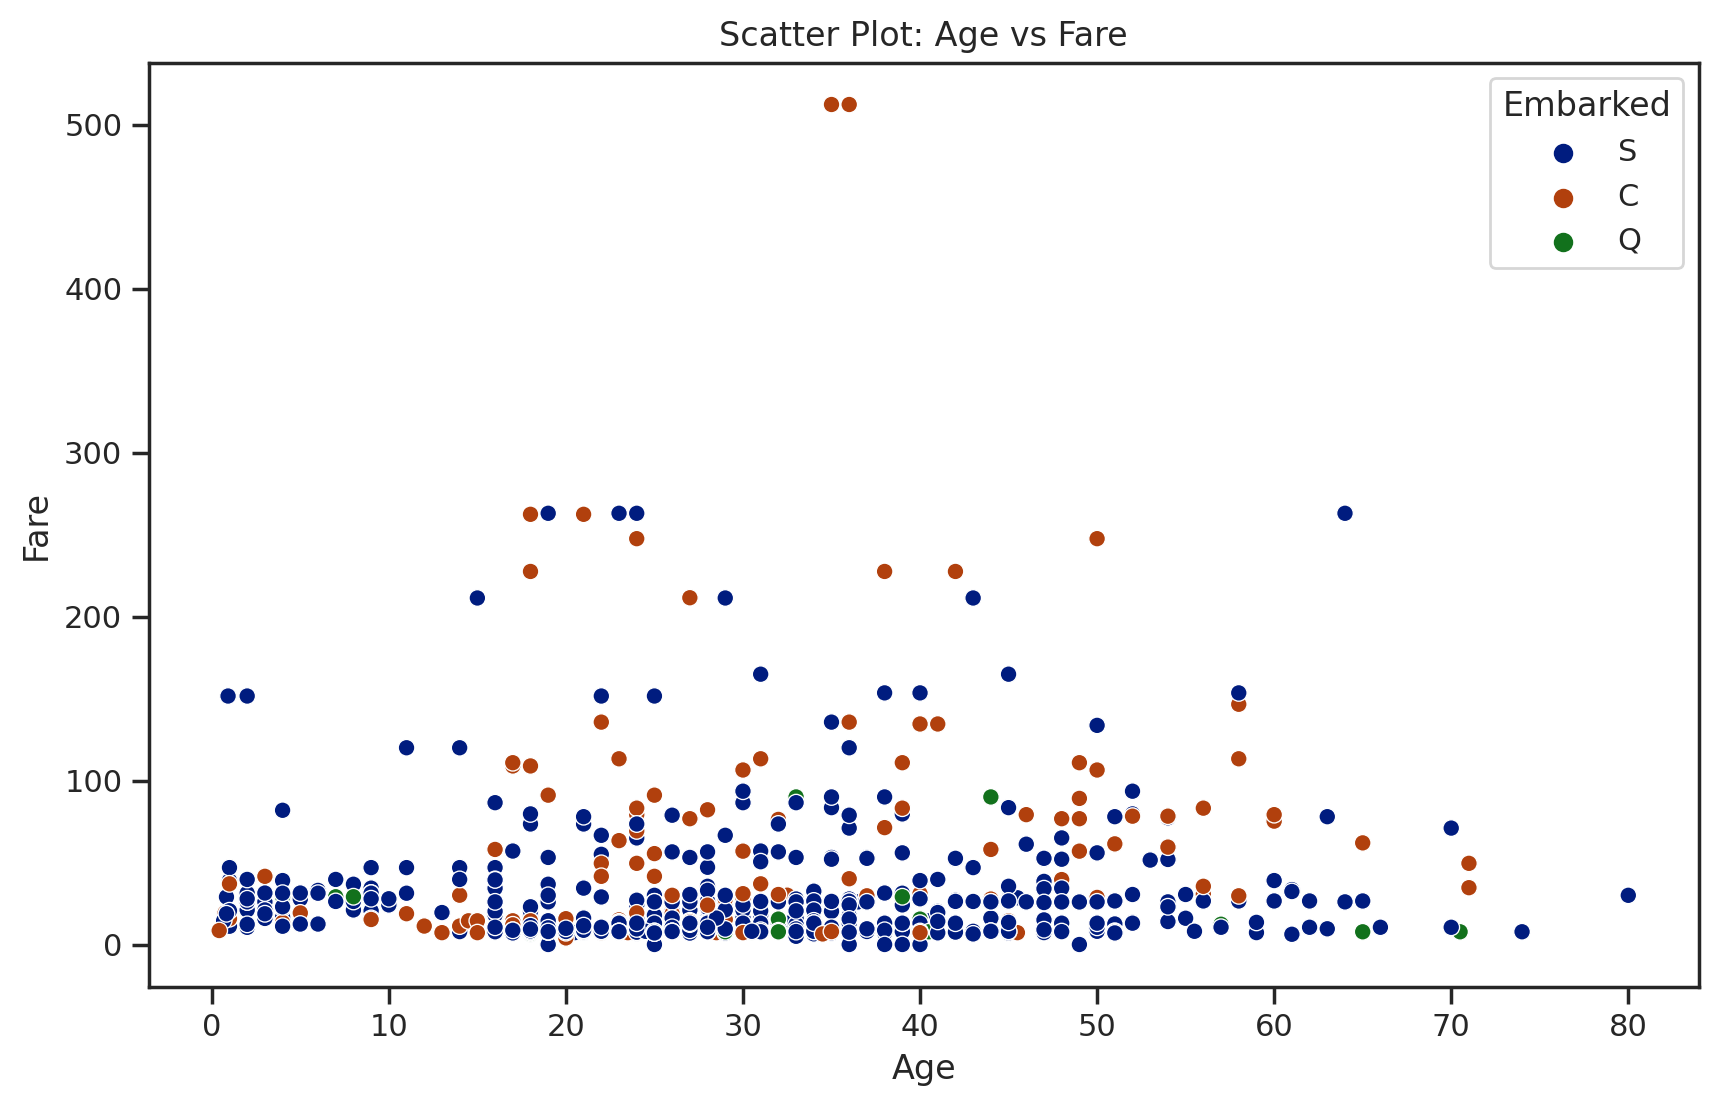

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Embarked')
plt.title('Scatter Plot: Age vs Fare')
plt.show()

**embarked** = Port of Embarkation
C = Cherbourg, Q = Queenstown, S = Southampton

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Gender', ylabel='Age'>

Text(0.5, 1.0, 'Violin Plot: Gender vs Age')

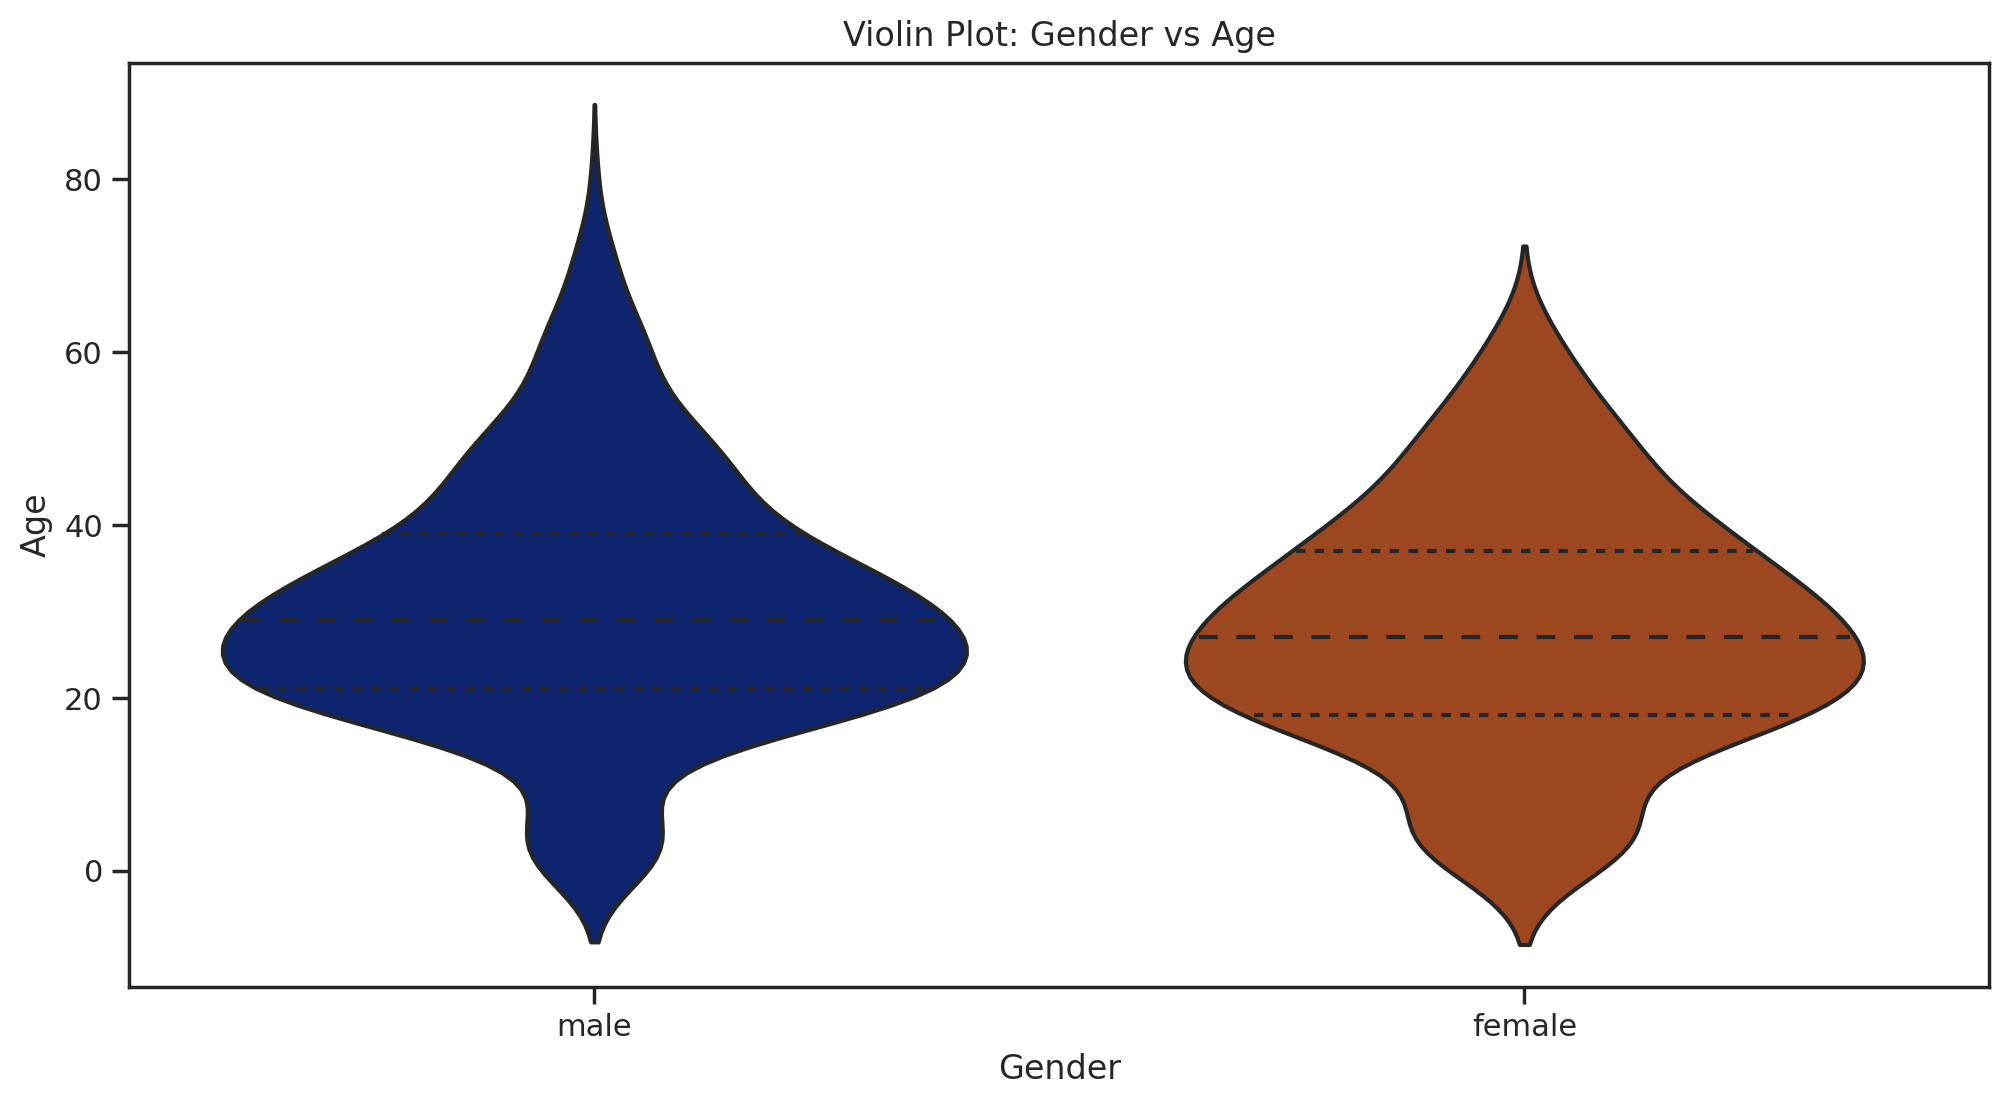

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Gender', ylabel='Fare'>

Text(0.5, 1.0, 'Violin Plot: Gender vs Fare')

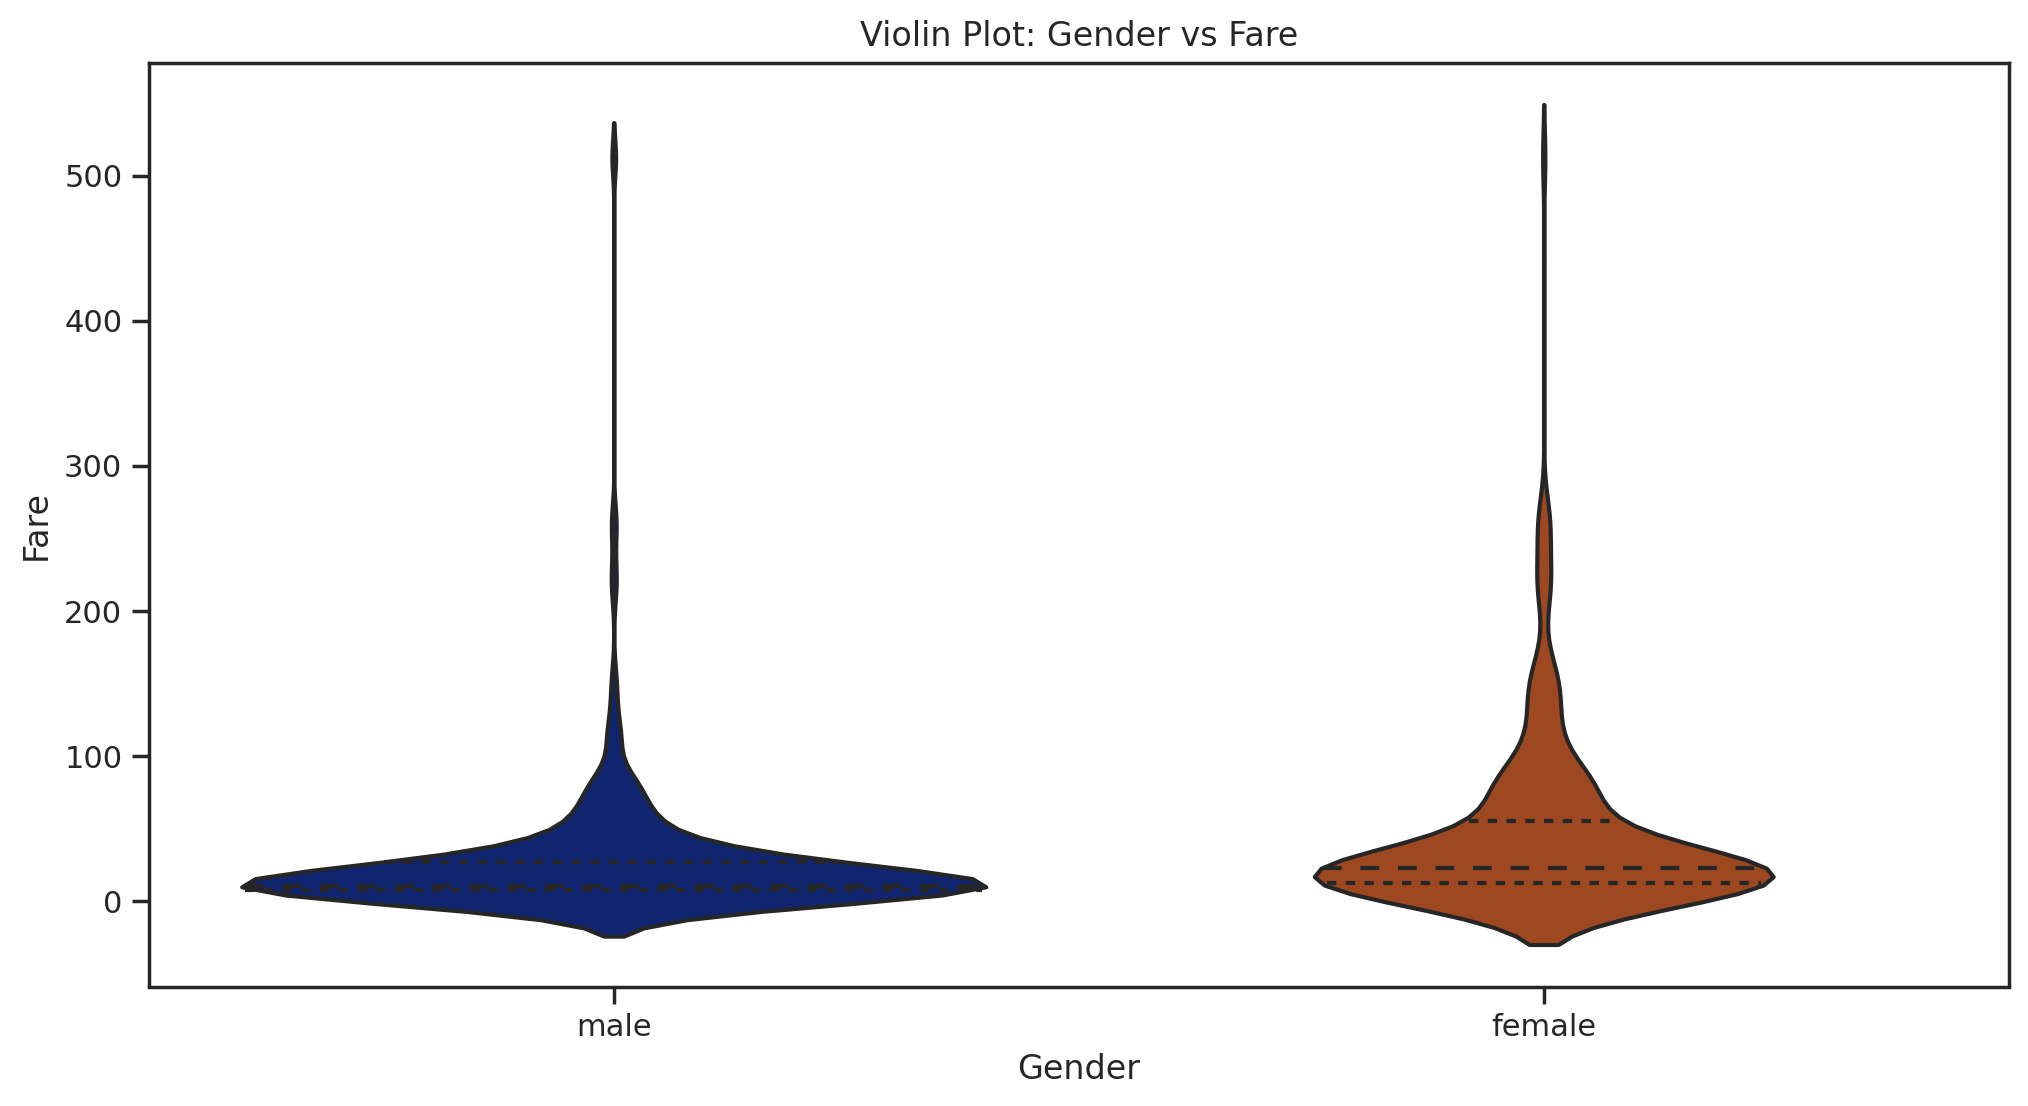

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Gender', y='Age', inner='quartile')
plt.title('Violin Plot: Gender vs Age')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Gender', y='Fare', inner='quartile')
plt.title('Violin Plot: Gender vs Fare')
plt.show()



Cleaning of train data for model construction

In [ ]:
df.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis = 1, inplace = True)
df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Gender        0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df['Gender'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
df['Gender'] = df['Gender'].map({'male' : 0, 'female' : 1})

In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
df['Embarked'] = df['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})

In [ ]:
df.shape
df.head()

(891, 8)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


Cleaning of test data for model construction

In [ ]:
df_test.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [ ]:
df_test.isnull().sum()

Pclass       0
Gender       0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [ ]:
df_test['Fare'].fillna(df_test['Fare'].mode()[0], inplace=True)
df_test['Age'].fillna(df_test['Age'].mode()[0], inplace=True)
df_test.isnull().sum()

Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df_test['Gender'] = df_test['Gender'].map({'male' : 0, 'female' : 1})
df_test['Embarked'] = df_test['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})

In [ ]:
df_test.shape
df_test.head()

(418, 7)

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


## Construct Model

In [ ]:
X=df

In [ ]:
# Choose target and features
y = X.Survived
X.pop('Survived')

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
X.head()
y.head()

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
# Split data into training and validation data, for both features and target:

train_X, test_X, y_train, y_test = train_test_split(X, y,random_state = 0, test_size=0.2)

In [ ]:
X.shape
train_X.shape
test_X.shape
y_train.shape
y_test.shape

(891, 7)

(712, 7)

(179, 7)

(712,)

(179,)

## 1. Train And Evaluate Support Vector Machine (SVM)


In [ ]:
svm = LinearSVC(max_iter = 10000)
svm = CalibratedClassifierCV(svm)
svm.fit(train_X, y_train)

CalibratedClassifierCV(estimator=LinearSVC(max_iter=10000))

In [ ]:
y_pred = svm.predict(test_X)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.7352941176470589
Recall: 0.7246376811594203
Accuracy: 0.7932960893854749


<BarContainer object of 3 artists>

(0.0, 1.0)

Text(0.5, 1.0, 'Model Performance Metrics')

Text(0, 0.5, 'Score')

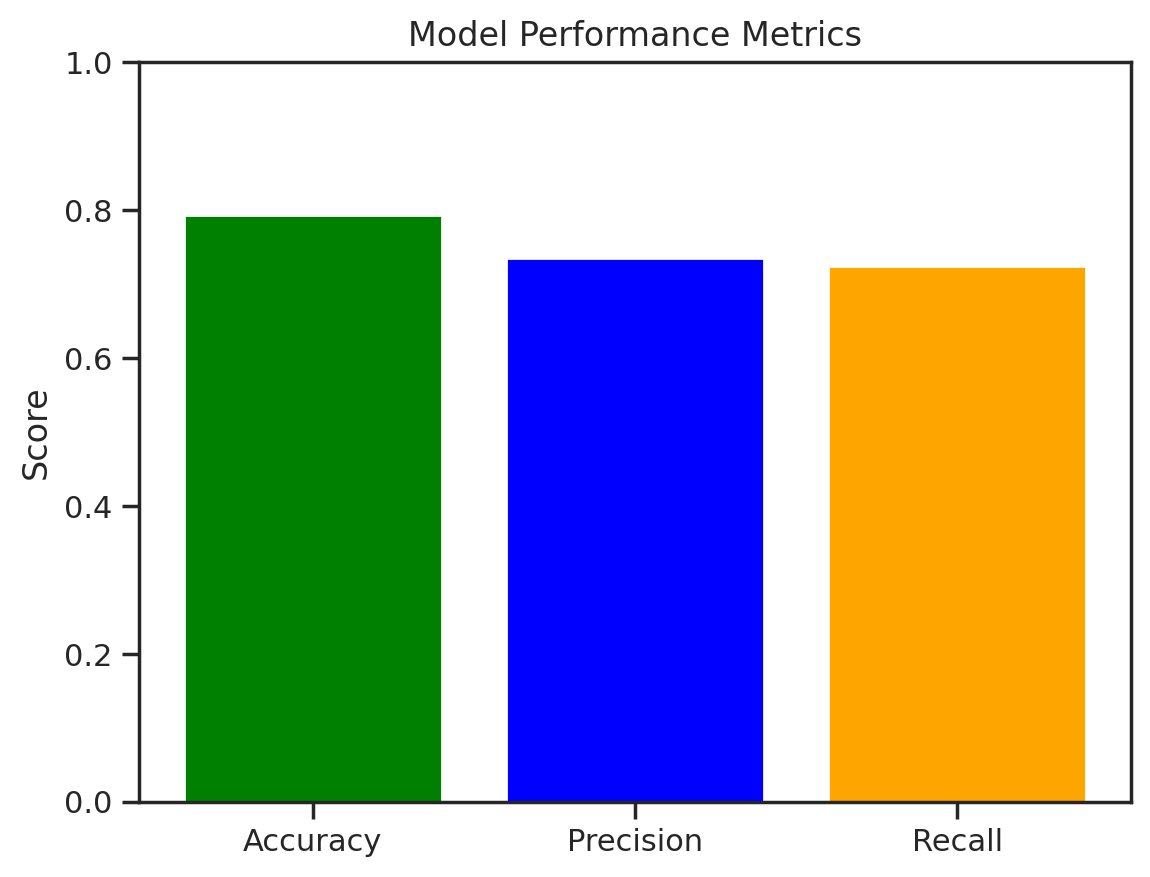

In [ ]:
# Create a bar plot
labels = ['Accuracy', 'Precision', 'Recall']
scores = [accuracy, precision, recall]
plt.bar(labels, scores, color=['green', 'blue', 'orange'])
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.show()


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[92, 18],
       [19, 50]])

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 32.249999999999986, 'Predicted')

Text(66.25, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix')

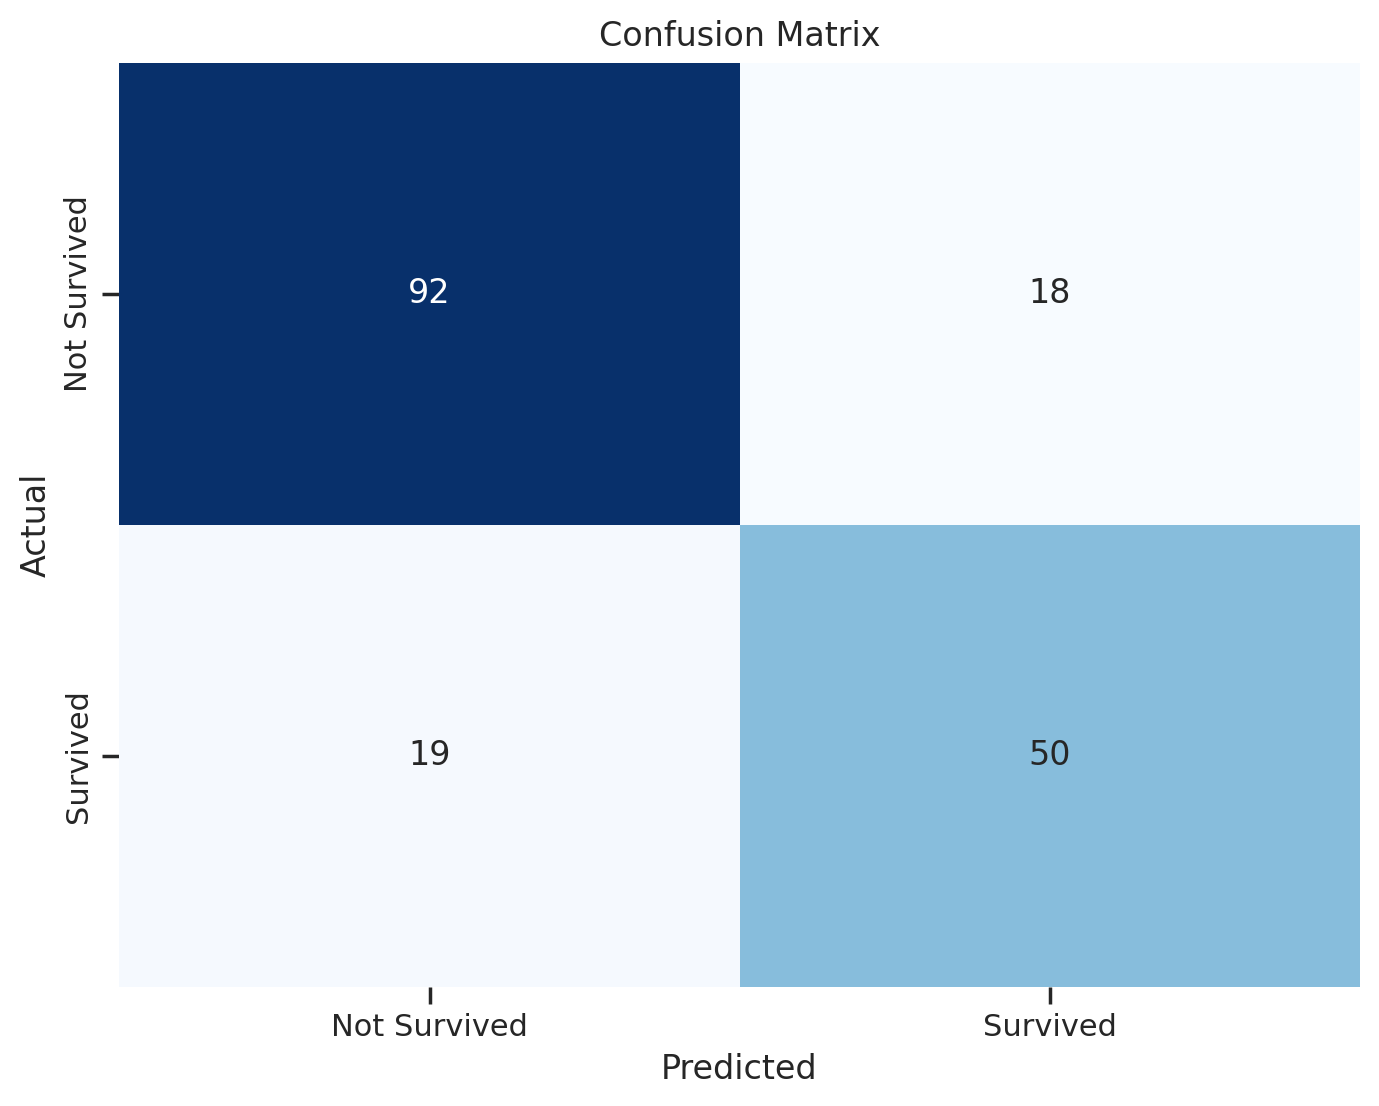

In [ ]:
# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 2. Train And Evaluate Gradient Boosting


In [ ]:
gb = GradientBoostingClassifier()

In [ ]:
gb.fit(train_X, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred = gb.predict(test_X)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.8888888888888888
Recall: 0.6956521739130435
Accuracy: 0.8491620111731844


<Figure size 800x600 with 0 Axes>

<BarContainer object of 3 artists>

(0.0, 1.0)

Text(0.5, 1.0, 'Model Performance Metrics')

Text(0, 0.5, 'Score')

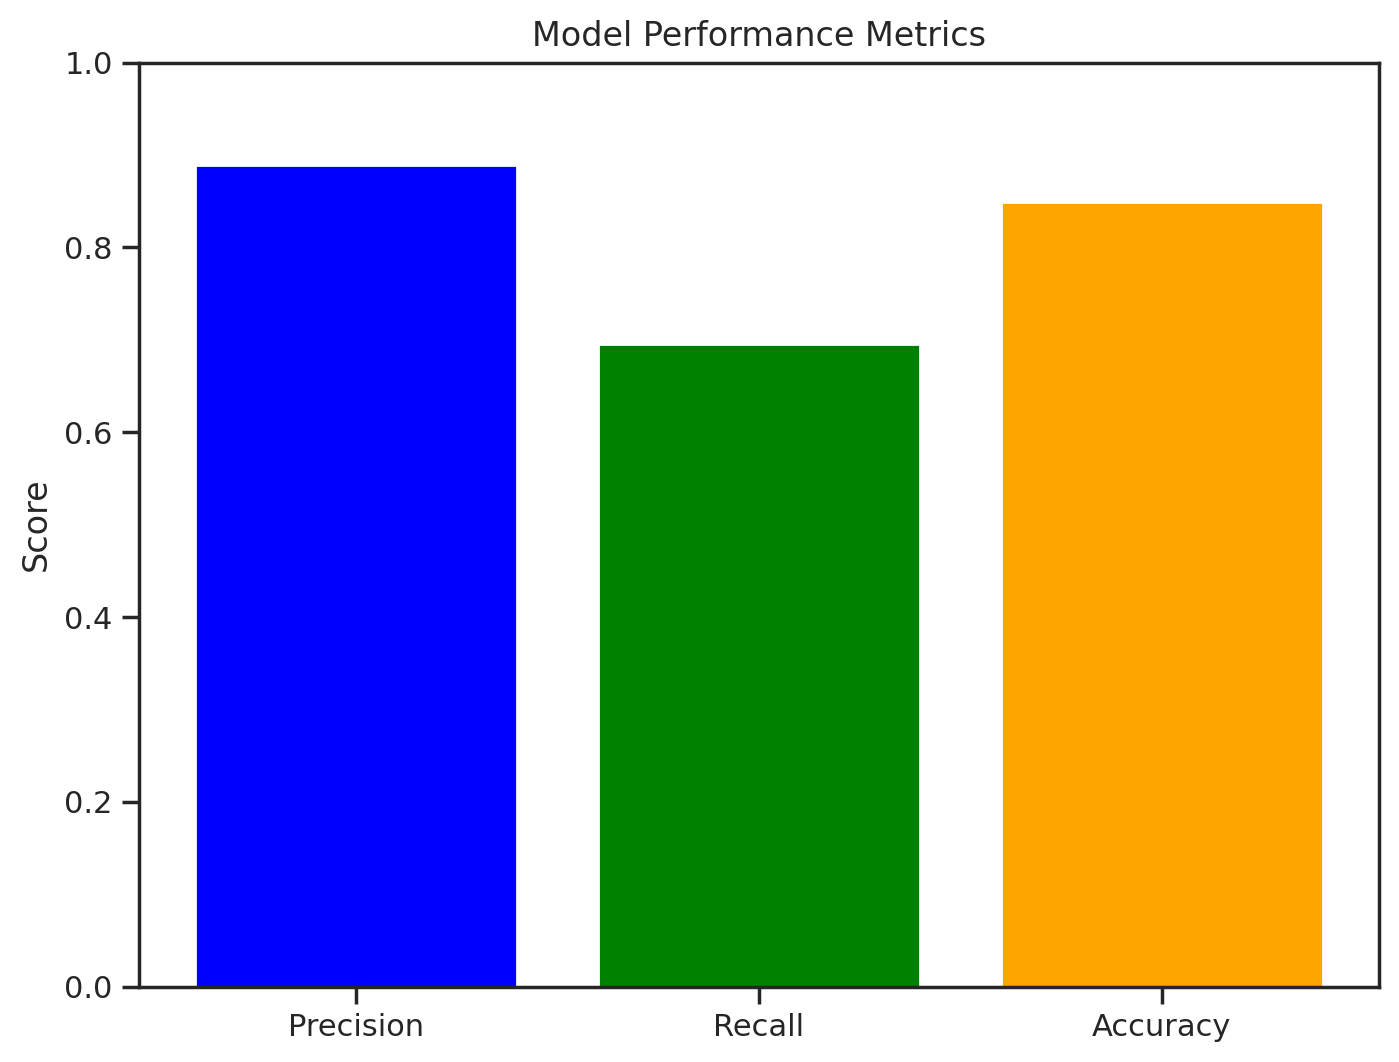

In [ ]:
# Labels for the metrics
metrics = ['Precision', 'Recall', 'Accuracy']

# Scores for the metrics
scores = [precision, recall, accuracy]

# Create a bar plot for metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[104,   6],
       [ 21,  48]])

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 32.249999999999986, 'Predicted')

Text(66.25, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix for Gradient Boosting Classifier')

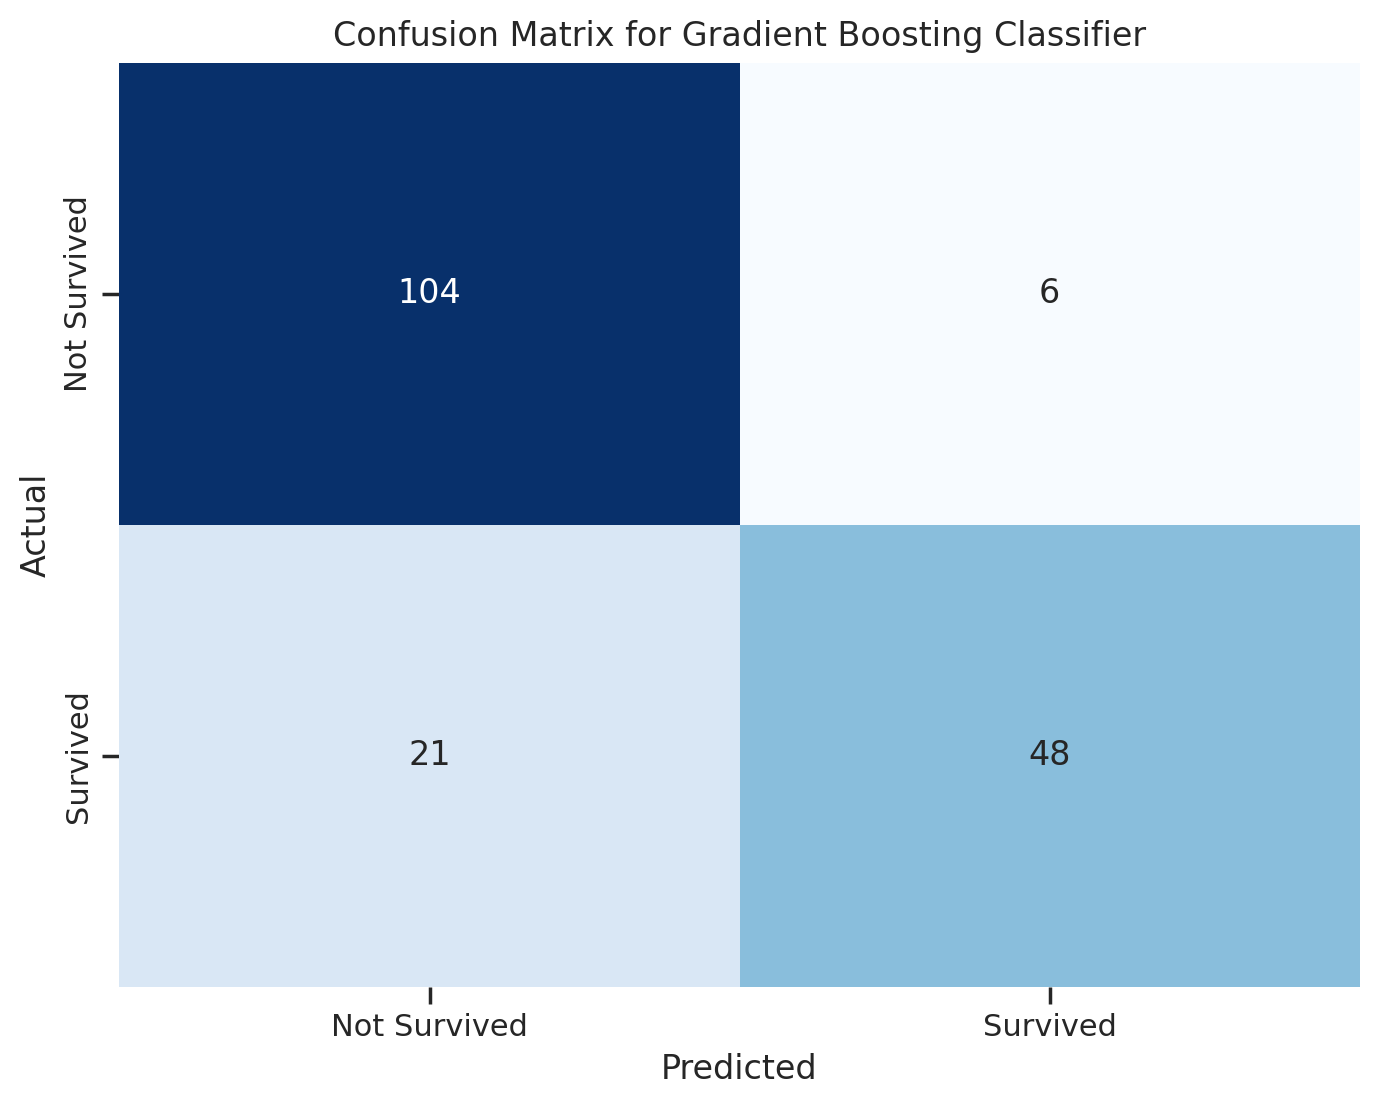

In [ ]:
# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

## 3. Train And Evaluate DecisionTreeClassifier




In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(train_X, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(test_X)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.7833333333333333
Recall: 0.6811594202898551
Accuracy: 0.8044692737430168


<BarContainer object of 3 artists>

(0.0, 1.0)

Text(0.5, 1.0, 'Model Performance Metrics')

Text(0, 0.5, 'Score')

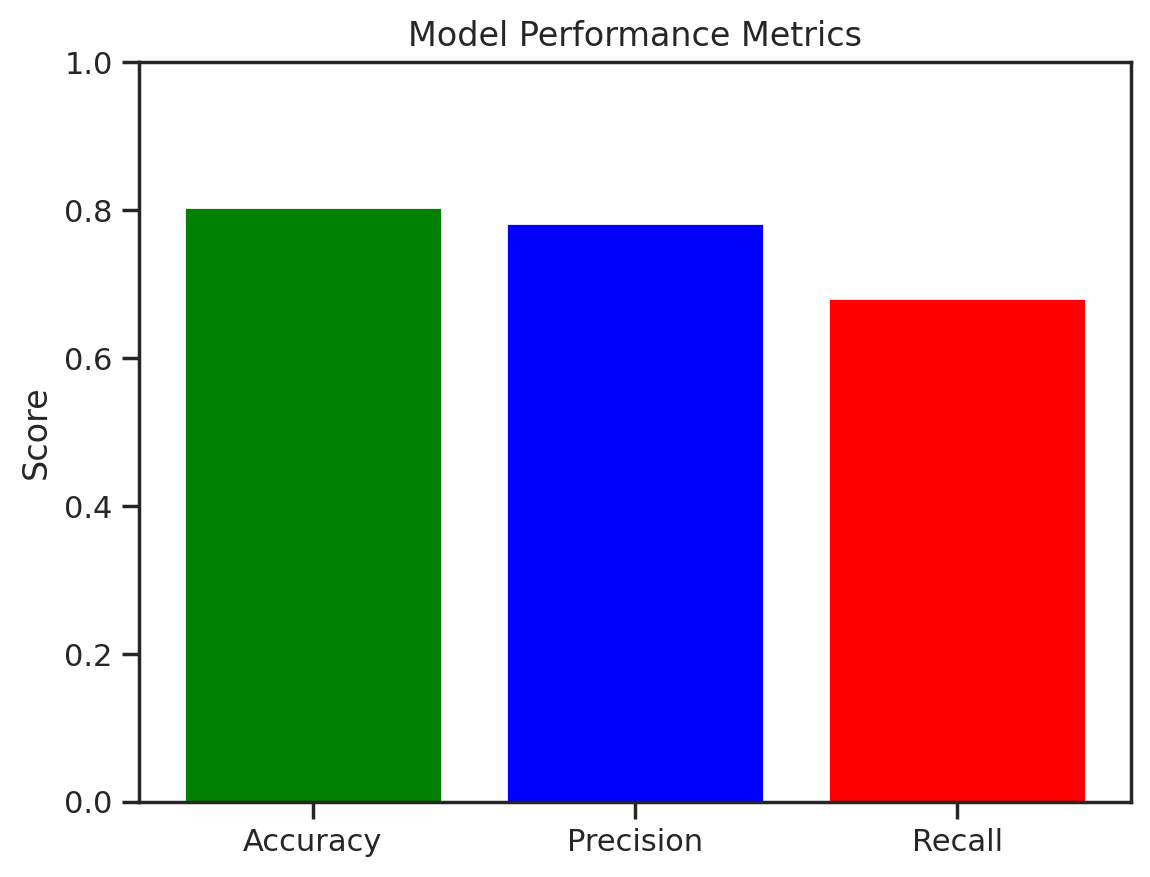

In [ ]:
# Create a bar plot
labels = ['Accuracy', 'Precision', 'Recall']
scores = [accuracy, precision, recall]
plt.bar(labels, scores, color=['green', 'blue', 'red'])
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[97, 13],
       [22, 47]])

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 32.249999999999986, 'Predicted')

Text(66.25, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

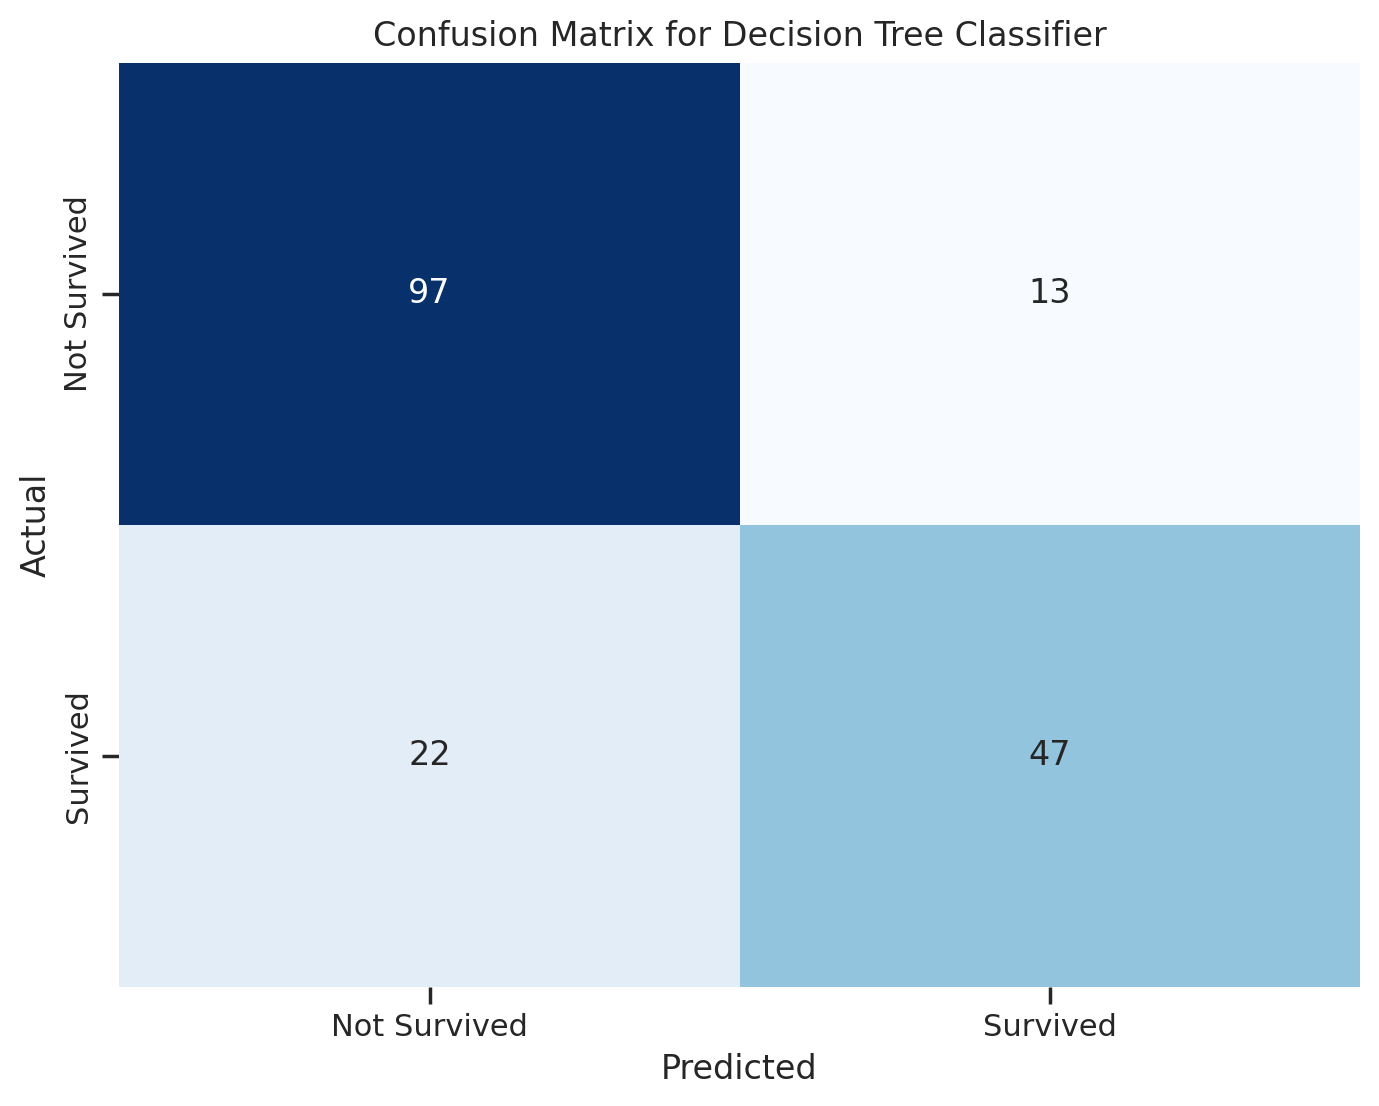

In [ ]:
# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

### 4. Train And Evaluate RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(train_X, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(test_X)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.8793103448275862
Recall: 0.7391304347826086
Accuracy: 0.8603351955307262


<BarContainer object of 3 artists>

(0.0, 1.0)

Text(0.5, 1.0, 'Model Performance Metrics')

Text(0, 0.5, 'Score')

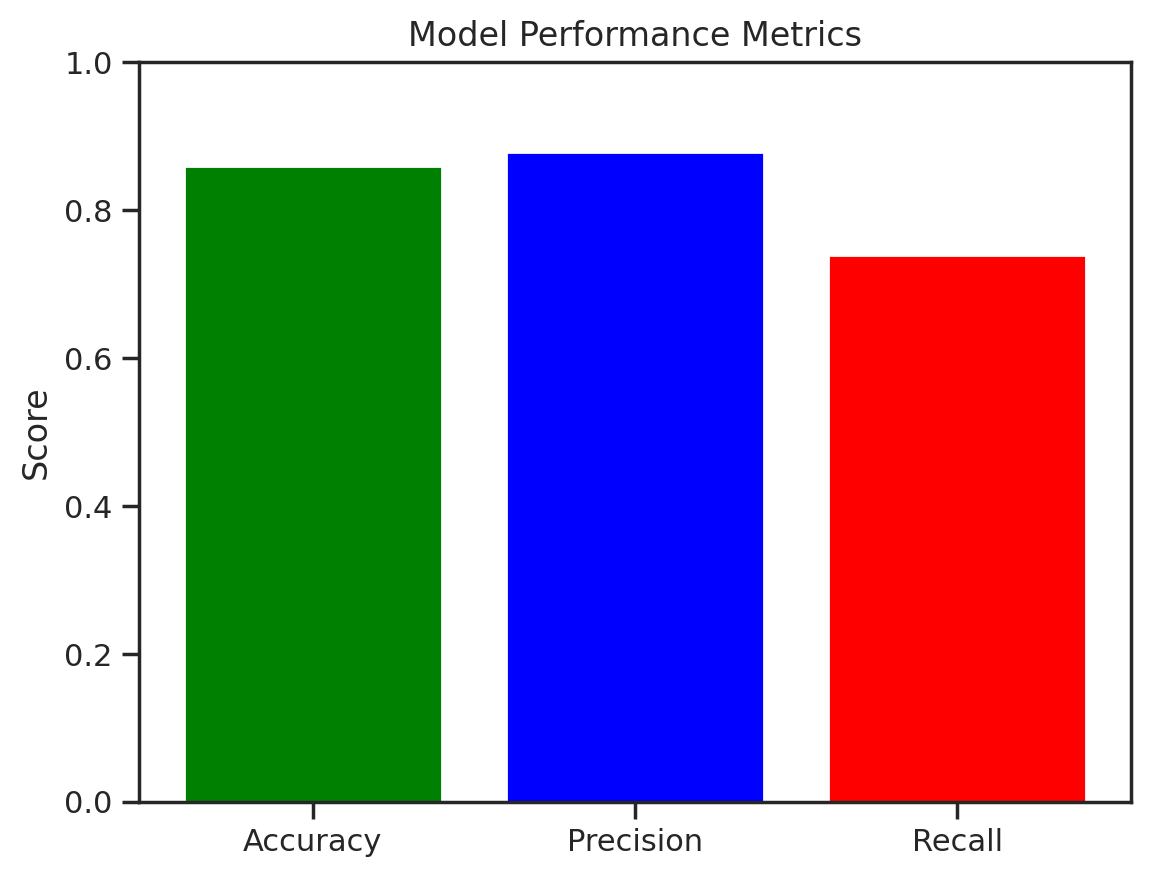

In [ ]:
# Create a bar plot
labels = ['Accuracy', 'Precision', 'Recall']
scores = [accuracy, precision, recall]
plt.bar(labels, scores, color=['green', 'blue', 'red'])
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[103,   7],
       [ 18,  51]])

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 32.249999999999986, 'Predicted')

Text(66.25, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

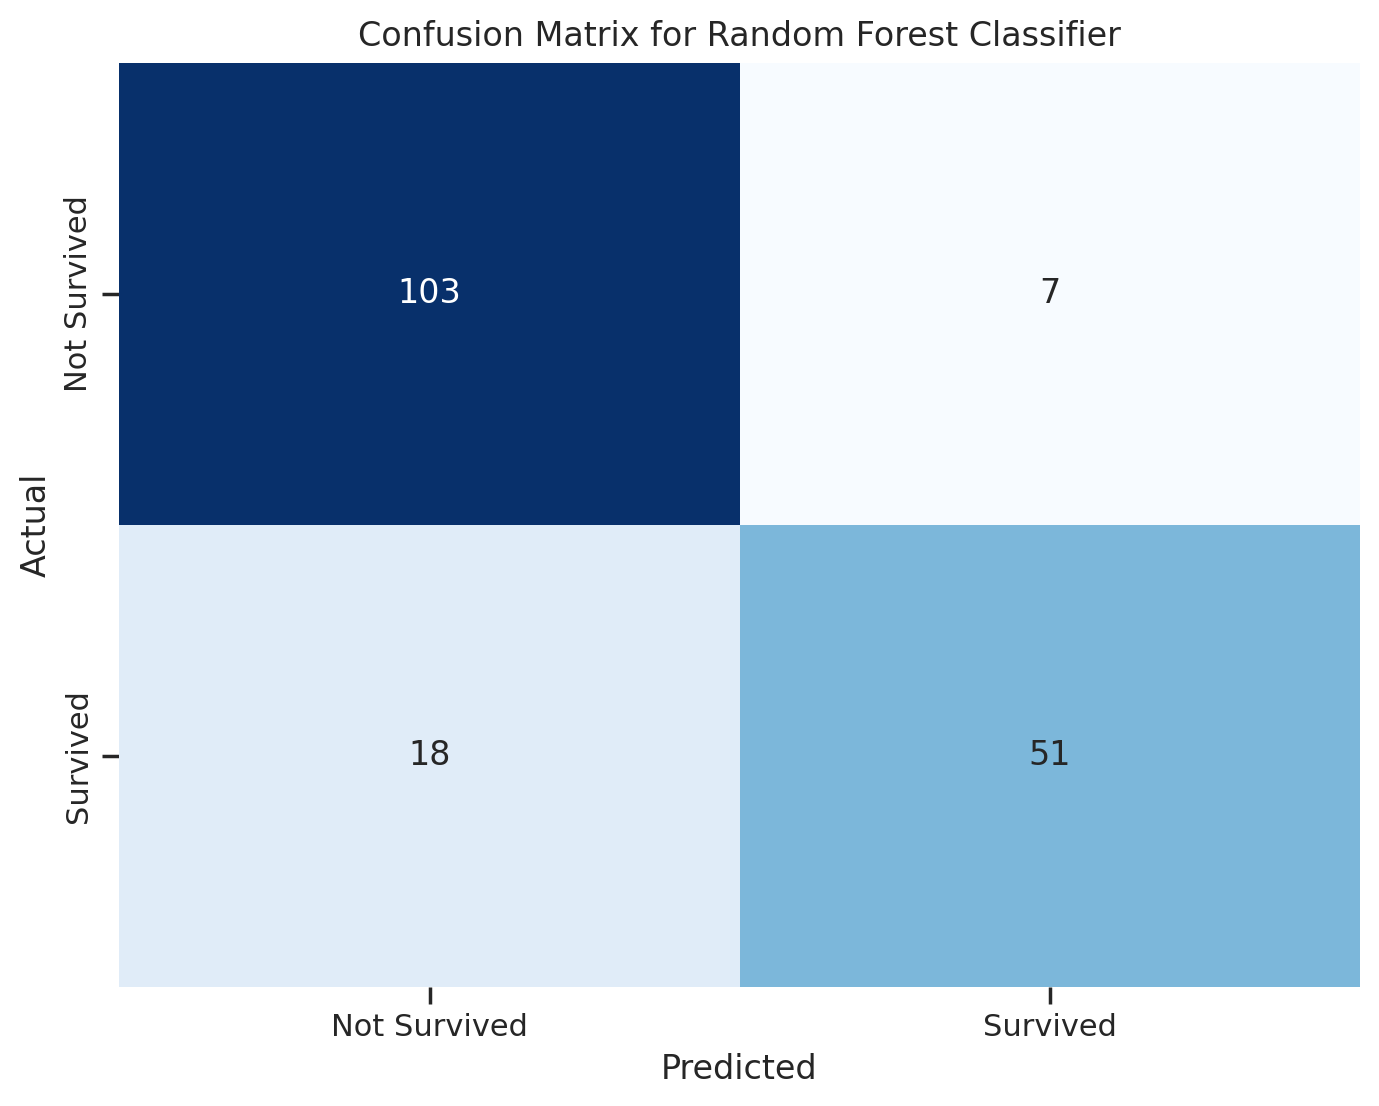

In [ ]:
# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

**5. Train And Evaluate XGBClassifier(XG Boost)**

In [ ]:
xg = XGBClassifier()                # (booster='gbtree',n_estimators=1,max_depth=3) using these Accuracy is 82 %

In [ ]:
xg.fit(train_X, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Make predictions
y_pred = xg.predict(test_X)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.85
Recall: 0.7391304347826086
Accuracy: 0.8491620111731844


<BarContainer object of 3 artists>

(0.0, 1.0)

Text(0.5, 1.0, 'Model Performance Metrics')

Text(0, 0.5, 'Score')

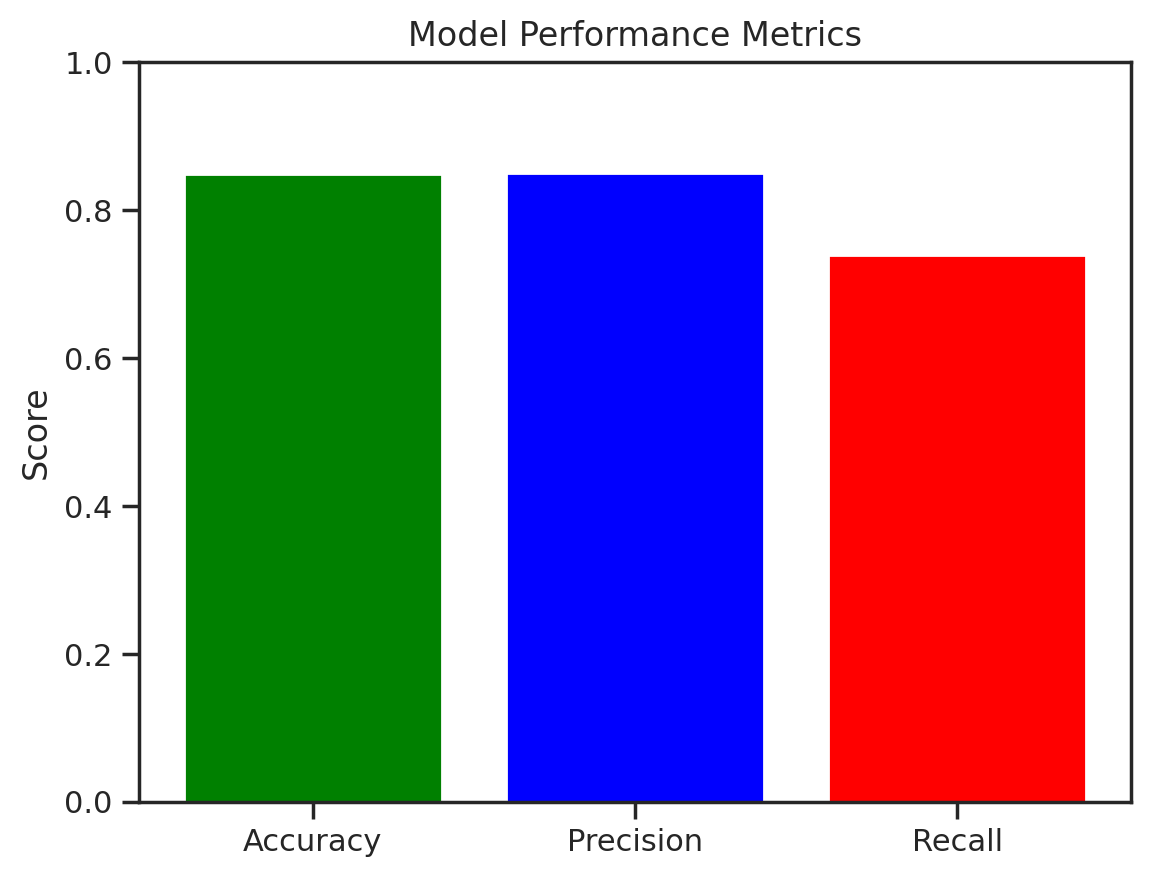

In [ ]:
# Create a bar plot
labels = ['Accuracy', 'Precision', 'Recall']
scores = [accuracy, precision, recall]
plt.bar(labels, scores, color=['green', 'blue', 'red'])
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[101,   9],
       [ 18,  51]])

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 32.249999999999986, 'Predicted')

Text(66.25, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

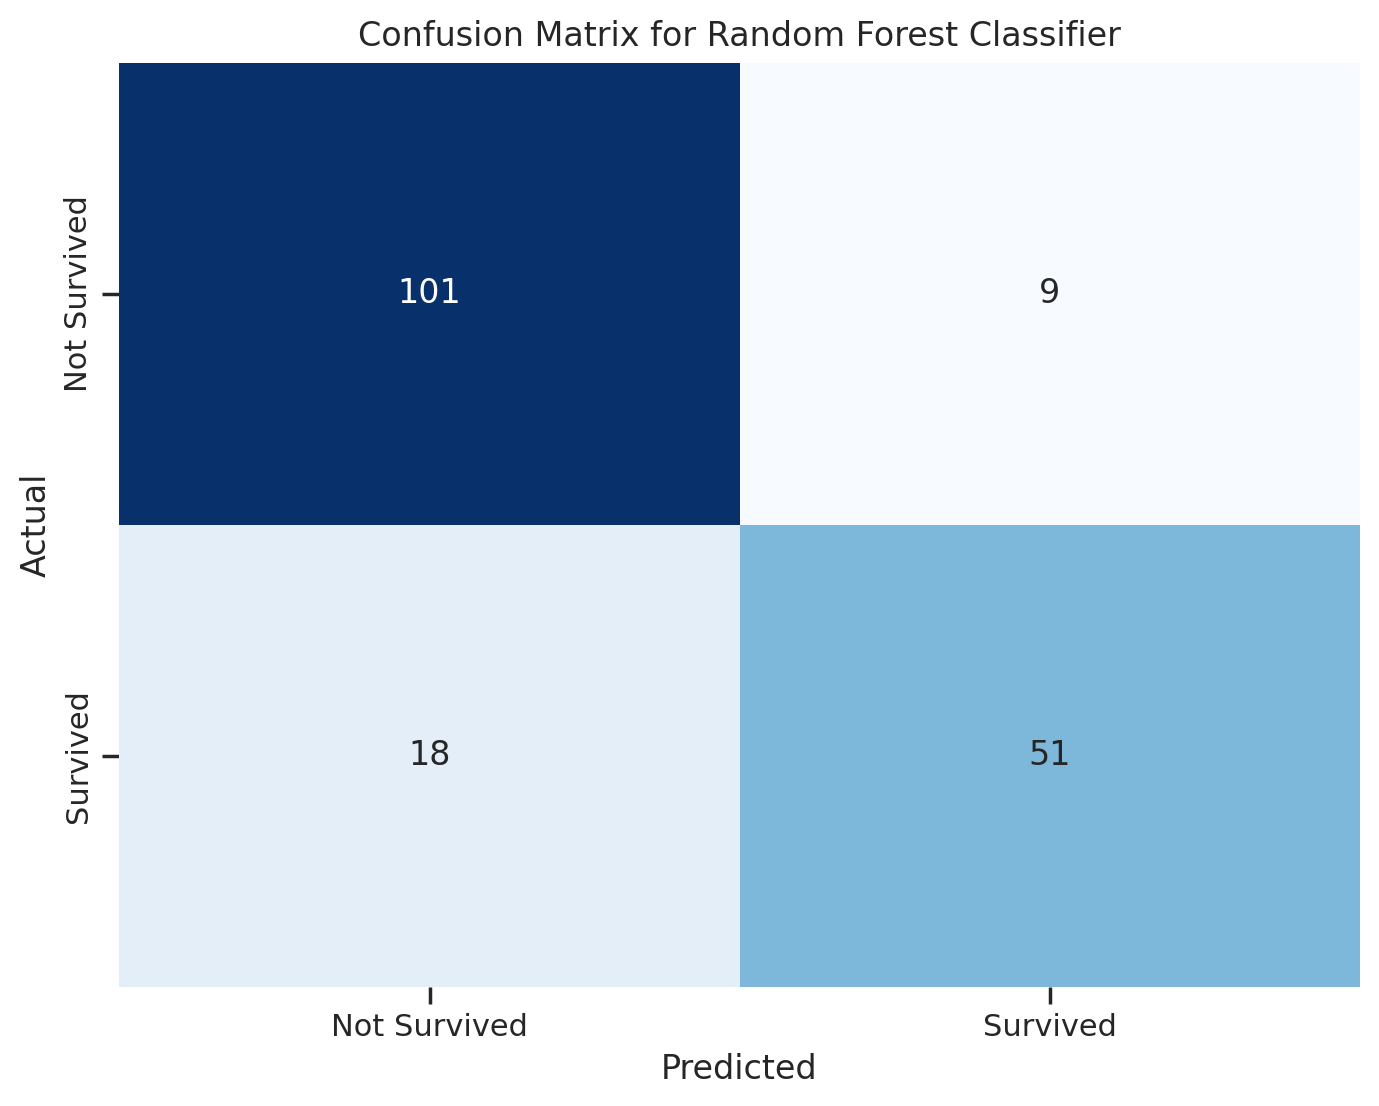

In [ ]:
# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

## Prediction

We are taking XGBClassifier in Prediction because it has highest Accuracy: 84.91 %

In [ ]:
xg_predictions = xg.predict(df_test)

In [ ]:
xg_predictions

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
df_test.columns

Index(['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [ ]:
test_sub = pd.read_csv("https://raw.githubusercontent.com/ram30098singh/Dataset/main/titanic_test.csv")


In [ ]:
xg_sub = pd.DataFrame({"PassengerId": test_sub["PassengerId"], "Survived": xg_predictions})

In [ ]:
xg_sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Survived', ylabel='count'>

([<matplotlib.axis.XTick at 0x7db240f92320>,
 [Text(0, 0, 'Not Survived (0)'), Text(1, 0, 'Survived (1)')])

Text(0, 0.5, 'Number of Passengers')

Text(0.5, 1.0, 'Survived vs Dead')

[Text(0, 0, '270.00'), Text(0, 0, '148.00')]

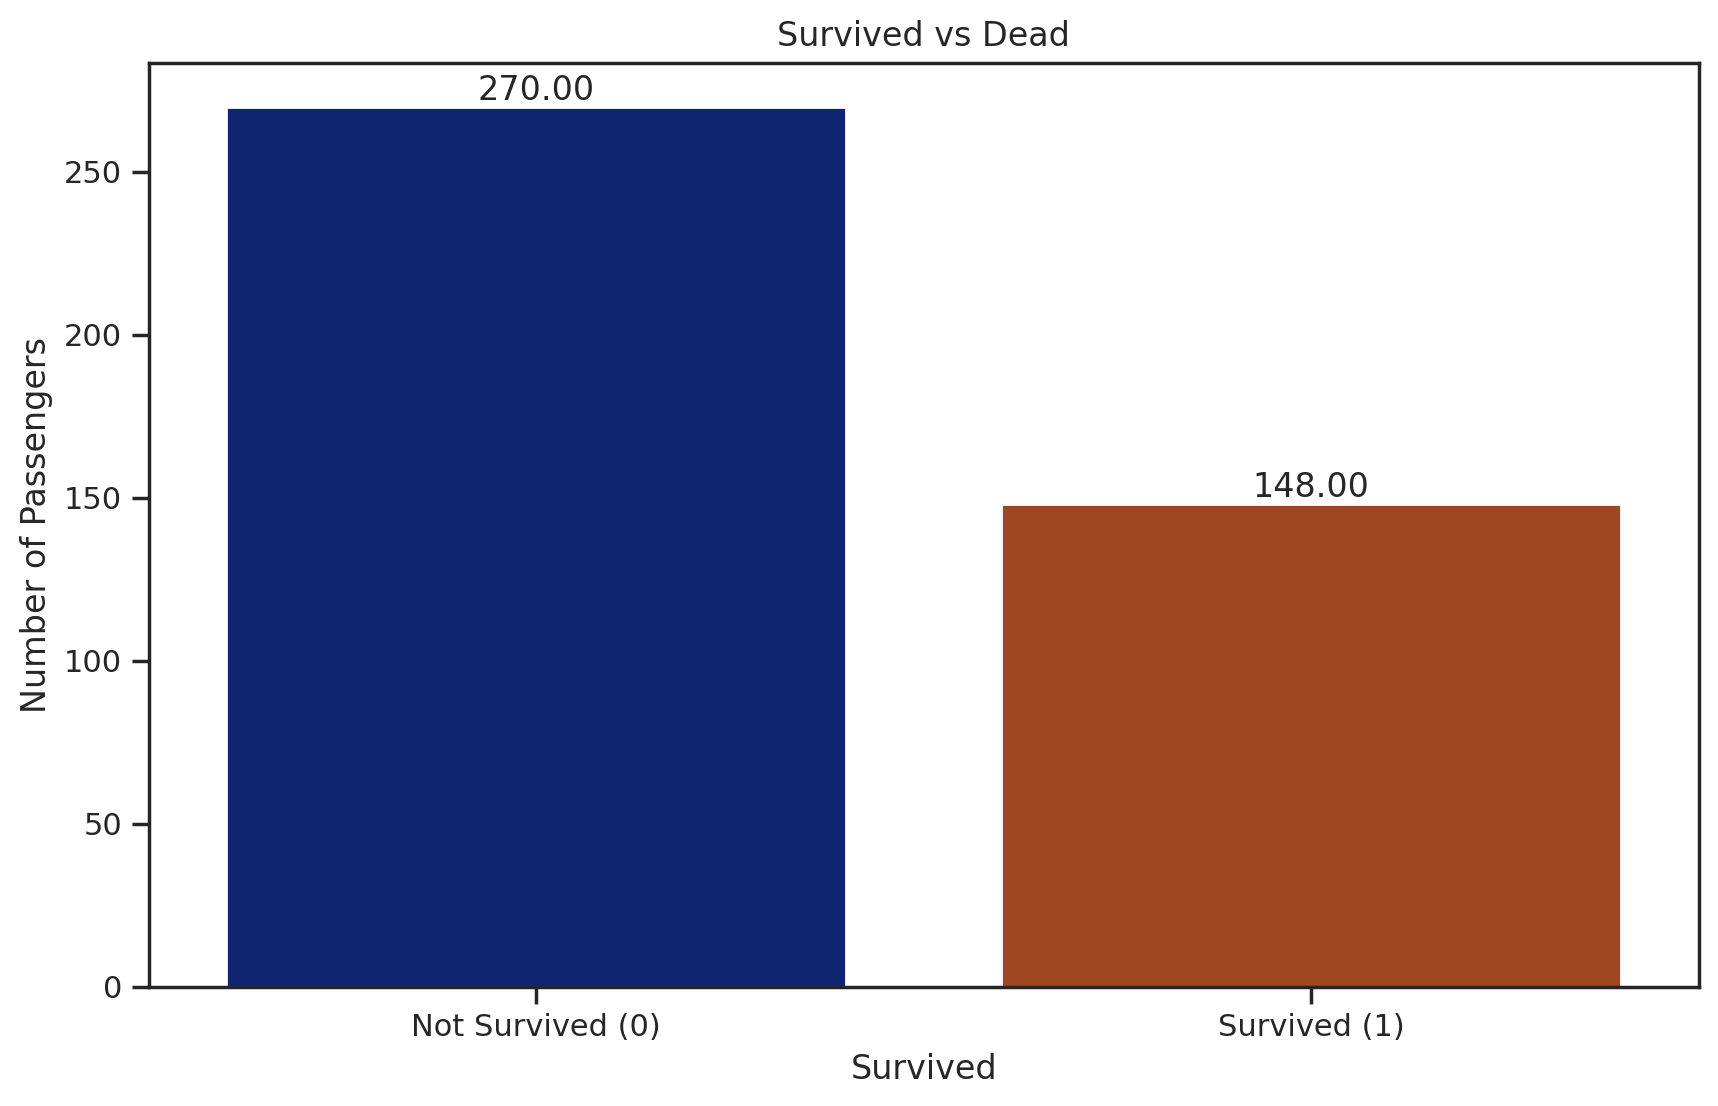

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_palette("dark")  # Set a dark color palette
sns.countplot(x='Survived', data=xg_sub)
plt.xticks(survived_counts.index, ["Not Survived (0)", "Survived (1)"])
plt.ylabel("Number of Passengers")
plt.title('Survived vs Dead')

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')

plt.show()

# 0 = No, 1 = Yes

In [ ]:
xg_sub.to_csv('submission.csv', index=False)